In [1]:
import platform
import PIL  # Pillow 包通常在 Python 中以 PIL 名称导入
import jupyterlab
import matplotlib
import ipympl
import numpy as np
import pandas as pd

# 打印 Python 版本
print("Python version:", platform.python_version())

# 打印 Pillow 版本
print("Pillow version:", PIL.__version__)

# 打印 JupyterLab 版本
print("JupyterLab version:", jupyterlab.__version__)

# 打印 matplotlib 版本
print("matplotlib version:", matplotlib.__version__)

# 打印 ipympl 版本
print("ipympl version:", ipympl.__version__)


# Python version: 3.10.16
# Pillow version: 11.1.0
# JupyterLab version: 4.3.5
# matplotlib version: 3.10.0
# ipympl version: 0.9.6


Python version: 3.10.16
Pillow version: 11.1.0
JupyterLab version: 4.3.5
matplotlib version: 3.10.0
ipympl version: 0.9.6


In [2]:
from openflow import InteractivePolygonGating, InteractiveHistogramThreshold

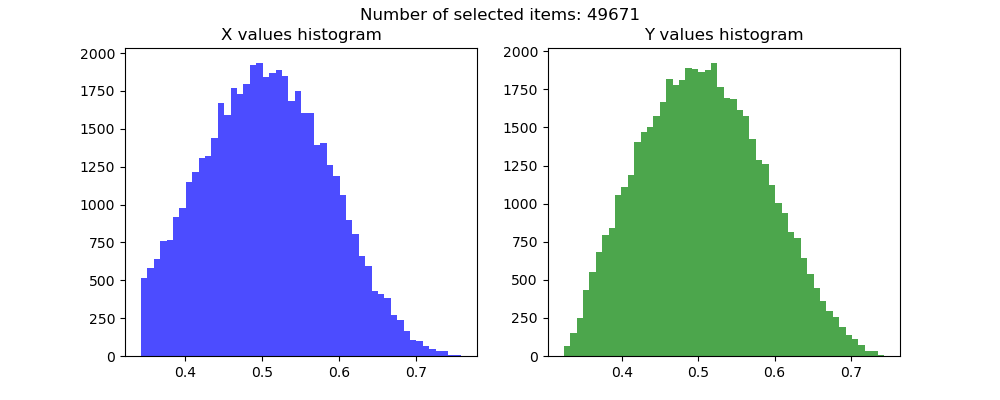

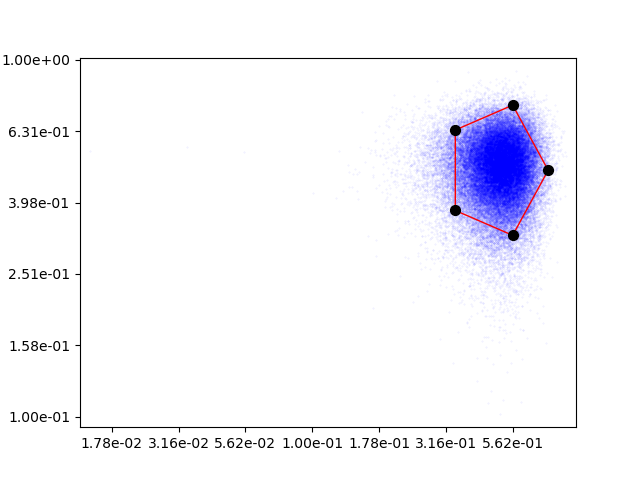

In [3]:
# Example usage:
if __name__ == "__main__":
    np.random.seed(0)
    # Generate sample data using normal distribution
    data = {
        'x': np.random.normal(0.5, 0.1, 60000),
        'y': np.random.normal(0.5, 0.1, 60000)
    }
    df = pd.DataFrame(data)

    # Create an instance of InteractivePolygonGating with 5 vertices and logarithmic scale enabled.
    gate1 = InteractivePolygonGating(df, 'x', 'y', num_edges=5, log=True)
    # As you drag the polygon the histograms and scatter plot will update.



          FSC-H         FSC-A         SSC-H         SSC-A        FL5-H  \
0  3.809595e+06  2.477391e+07  4.462111e+06  2.388381e+07  1115.900024   
1  3.560230e+06  7.536824e+06  3.112974e+06  4.911494e+06  1332.900024   
2  7.482157e+05  5.051149e+05  4.738253e+05  3.529944e+05  1008.000000   
3  2.815433e+06  4.244122e+06  1.545921e+06  1.840636e+06  1029.900024   
4  3.255092e+06  6.020094e+06  3.895188e+06  5.147354e+06   782.599976   

         FL5-A      FL11-H      FL11-A        FL8-H         FL8-A  \
0  1210.300049  413.500000  362.600006  7368.200195  15690.599609   
1   268.500000  295.799988  180.800003   475.399994    524.400024   
2    98.699997  155.600006   10.900000   625.299988    338.700012   
3  -104.300003  376.500000  -56.599998   657.299988    354.799988   
4   126.699997  198.199997   42.000000   600.599976    465.700012   

     FSC-Width   Time  
0  6659.107910    0.0  
1  2167.759033    8.0  
2   691.300720    9.0  
3  1543.628296   39.0  
4  1893.827881  144.

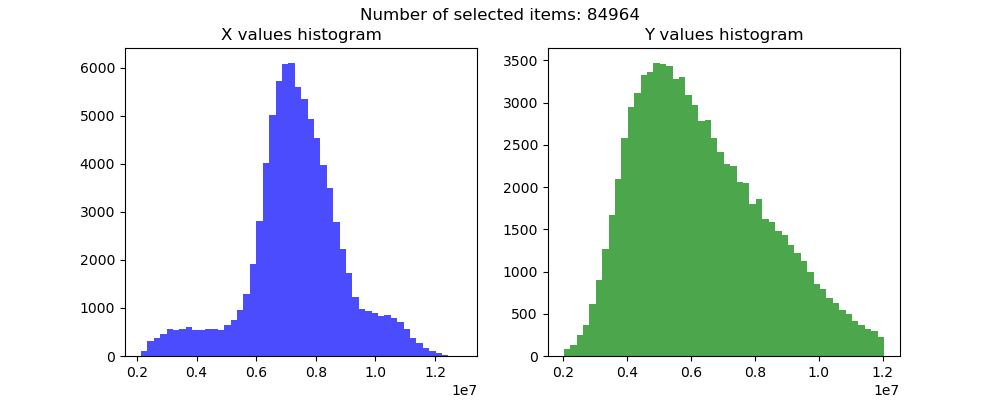

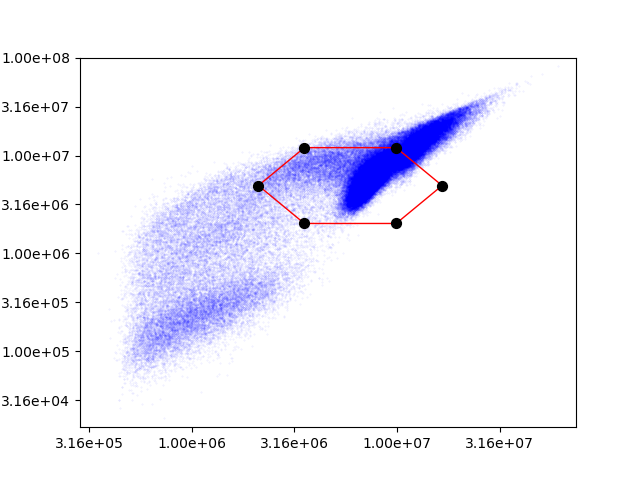

In [4]:

import FlowCal
import pandas as pd

# Read the .facs file
file_path = r'/Users/mingzhchen/Documents/GitHub/cytoflex/data/Exp_20250219/Exp_20240417_S2/01-Well-A1.fcs'
data = FlowCal.io.FCSData(file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data.channels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate1 = InteractivePolygonGating(filtered_df, 'FSC-A', 'SSC-A', num_edges=6, log=True)


In [ ]:
gate2.lower_line

TypeError: 'Line2D' object is not callable

In [5]:
df2 = gate1.selected_data
print(df2.head())

        FSC-H      FSC-A       SSC-H       SSC-A        FL5-H       FL5-A  \
1  3560230.00  7536824.5  3112973.50  4911494.50  1332.900024  268.500000   
4  3255092.50  6020094.5  3895187.75  5147354.00   782.599976  126.699997   
5  3260507.75  6739660.5  2846413.75  4126506.25   866.500000  347.700012   
8  3364918.50  7080627.0  5519776.50  9583422.00   850.500000  276.100006   
9  3467862.00  7022602.5  3403669.50  4457803.00  1170.199951  589.500000   

       FL11-H      FL11-A          FL8-H          FL8-A    FSC-Width   Time  
1  295.799988  180.800003     475.399994     524.400024  2167.759033    8.0  
4  198.199997   42.000000     600.599976     465.700012  1893.827881  144.0  
5  344.200012  180.000000     507.399994     574.900024  2116.670166  154.0  
8  341.500000  258.100006     583.200012     518.299988  2154.755127  227.0  
9  249.600006   41.299999  214336.906250  342714.187500  2073.657227  284.0  


Number of selected items: 986


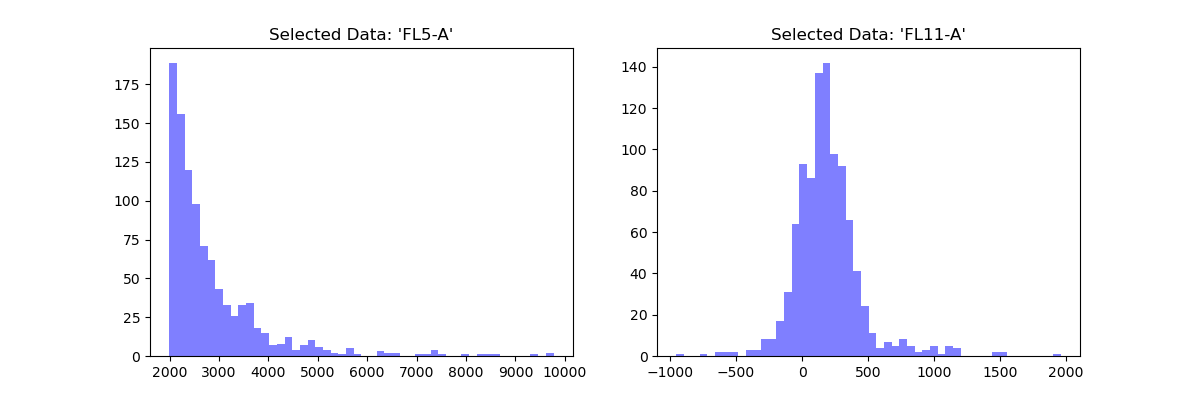

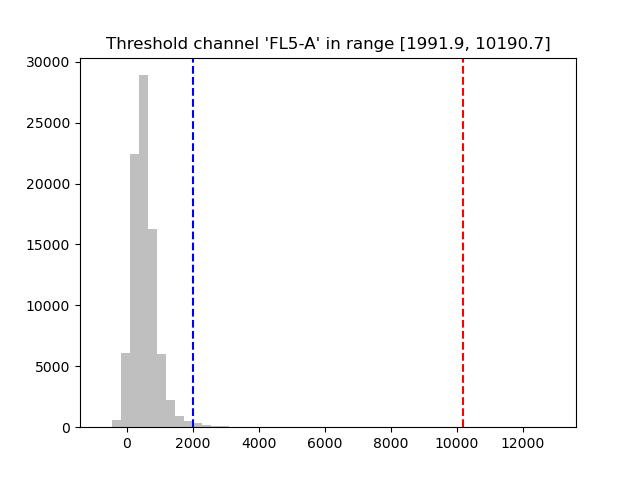

In [6]:
gate2 = InteractiveHistogramThreshold(
    data=df2,
    threshold_channel='FL5-A',
    plot_channels=['FL5-A','FL11-A']
)

In [7]:
df3 = gate2.selected_data
df3

,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
140,3165630.75,5846908.5,3751217.0,4923923.0,2106.000000,2618.600098,366.500000,449.000000,2.375123e+06,3.495773e+06,1891.328125,2863.0
179,3566990.50,7750052.0,5548940.0,8646838.0,2755.199951,3177.000000,196.600006,-38.000000,3.321690e+06,5.251370e+06,2224.863525,3756.0
397,3655712.75,8237074.0,5611893.0,10273783.0,2561.199951,3526.899902,261.500000,160.000000,2.984088e+06,4.962358e+06,2307.283447,9817.0
680,3648121.50,7371724.5,5528427.0,8116382.5,1712.900024,2021.599976,247.399994,-23.900000,1.227533e+06,1.881679e+06,2069.187744,21954.0
913,3348915.50,6947368.0,5543223.5,8501762.0,2609.600098,2720.000000,487.299988,264.299988,2.787801e+06,4.512378e+06,2124.303223,30973.0
...,...,...,...,...,...,...,...,...,...,...,...,...
140968,3853737.00,8821260.0,5631621.0,11417751.0,1895.500000,2141.800049,447.600006,424.399994,2.945250e+04,3.885360e+04,2343.951416,2981920.0
141088,3336892.75,6608906.0,5404880.0,7681766.0,3095.699951,3716.699951,214.699997,-130.899994,3.518954e+06,5.647293e+06,2028.093018,2984171.0
141222,2934686.75,5939427.5,5617145.0,11170549.0,1572.300049,2302.199951,384.399994,533.000000,1.504220e+04,2.074730e+04,2072.448730,2986535.0
141285,3255299.00,6302152.0,5614053.5,11468715.0,2183.300049,2618.800049,240.600006,133.800003,2.671774e+06,4.682545e+06,1982.432251,2987819.0


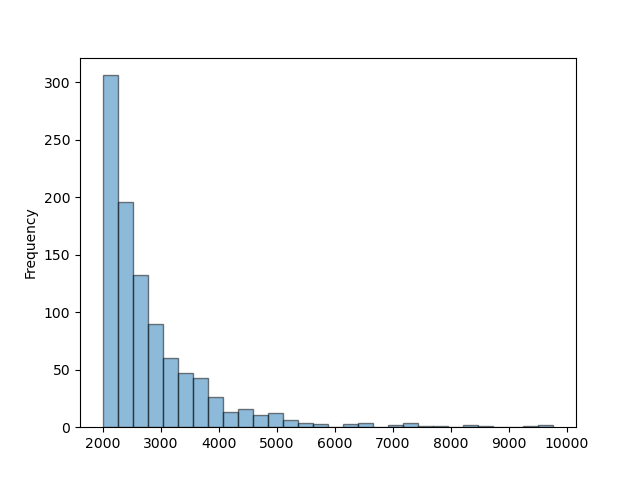

In [8]:
import matplotlib.pyplot as plt
# histogram plot FL5-A channel
plt.figure()
df3["FL5-A"].plot.hist(bins=30, alpha=0.5, edgecolor='black')
plt.show()

        FSC-H      FSC-A       SSC-H      SSC-A        FL5-H        FL5-A  \
0  3408876.00  7104059.5  2951395.50  4041013.5  1195.500000   189.199997   
1  3797404.75  8366968.5  5465026.00  7927780.5  1579.400024  1211.500000   
2  3132632.25  4549638.5  3940678.25  5950856.0  1002.000000   192.699997   
3  3182707.50  6242210.0  2845738.00  4065816.0   975.700012    -5.100000   
5  3574938.25  7525374.5  4610270.50  6815633.0   752.000000   478.299988   

       FL11-H      FL11-A         FL8-H         FL8-A    FSC-Width   Time  
0  217.300003  141.300003  27082.500000  42914.300781  2134.007080    0.0  
1  391.200012   67.300003    856.799988   1266.400024  2256.221436   25.0  
2  319.100006   38.000000    677.500000    974.500000  1487.193115   88.0  
3  158.699997    0.500000   2670.199951   3237.300049  2008.362427   89.0  
5  183.199997 -381.100006   8900.500000  11224.299805  2155.558350  209.0  


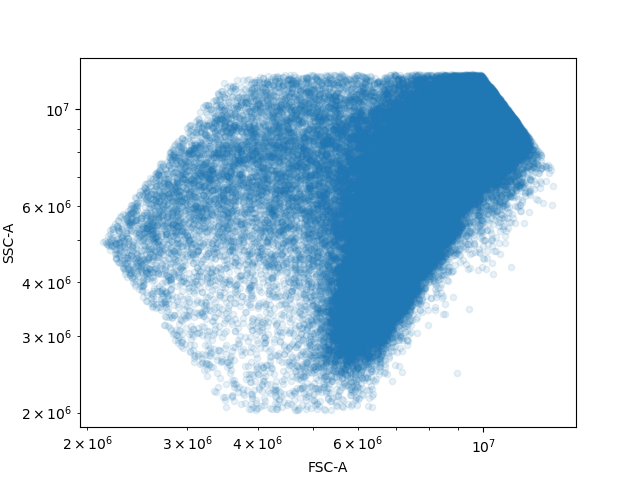

In [9]:
# Load another .fcs file
another_file = r'/Users/mingzhchen/Documents/GitHub/cytoflex/data/Exp_20250219/Exp_20240417_S2/01-Well-A2.fcs'

another_data = FlowCal.io.FCSData(another_file)


# Convert to a pandas DataFrame
another_df = pd.DataFrame(another_data, columns=another_data.channels)
another_filtered_df = another_df[(another_df['FSC-A'] > 0) & (another_df['SSC-A'] > 0)]

another_subdate =gate1.apply_gate(another_filtered_df)
print(another_subdate.head())
another_subdate.plot.scatter(x='FSC-A', y='SSC-A', alpha=0.1)
# Make log plot
plt.xscale('log')
plt.yscale('log')

Applied gate to new data. Selected 4420 out of 127011 items.
             FSC-H       FSC-A      SSC-H       SSC-A        FL5-H  \
108     3461705.50   7286403.5  4300343.5   5944778.5  2202.800049   
113     3880375.25  10156987.0  5623512.0  11096737.0  1989.000000   
144     3465937.50   7436403.0  3657287.5   5292806.0  2290.800049   
330     2839260.00   4642782.5  4849840.0   7787908.5  2521.500000   
388     3703631.75   8280268.0  5438862.0   7477899.5  2498.000000   
...            ...         ...        ...         ...          ...   
186377  3595243.25   7025389.5  5642115.5  10539202.0  3655.000000   
186396  3557662.75   7261958.5  5508100.0   8310764.5  7099.700195   
186603  3171676.25   5697417.0  5468132.0   7376480.0  2130.600098   
186873  3313105.00   6733969.5  3694753.0   4853414.5  2214.899902   
186886  3622367.75   6896223.0  4871518.0   6118956.0  2827.899902   

              FL5-A      FL11-H      FL11-A       FL8-H         FL8-A  \
108     2351.199951  352.

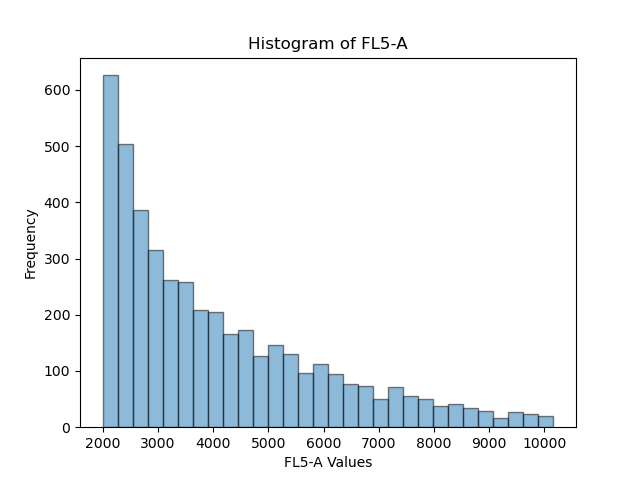

In [10]:
another_subdate_hist = gate2.apply_gate(another_subdate)
print(another_subdate_hist)
plt.figure()
another_subdate_hist["FL5-A"].plot.hist(bins=30, alpha=0.5, edgecolor='black')
plt.title('Histogram of FL5-A')
plt.xlabel('FL5-A Values')
plt.ylabel('Frequency')
plt.show()